In [265]:
import mlrose_hiive
from mlrose_hiive.generators import TSPGenerator
from mlrose_hiive.algorithms import GeomDecay
import matplotlib.pyplot as plt
import pandas as pd
import  numpy as np
plt.style.use('seaborn-whitegrid')

seed = 0
output_dir = 'output'
figure_dir = 'figures'
exp_name = 'TSP'
%matplotlib inline

In [20]:
problem = TSPGenerator.generate(seed=seed, number_of_cities=22)
max_attempts = problem.get_length()

In [17]:
restarts = [i for i in range(10, 101, 10)]
rhc_runner = mlrose_hiive.RHCRunner(problem,
                                    seed=seed,
                                    experiment_name=exp_name,
                                    iteration_list=[100000],
                                    output_directory=output_dir,
                                    restart_list=restarts,
                                    max_attempts=max_attempts)
rhc_stats, rhc_curve = rhc_runner.run()

Running rhc
*****************
*** Run START ***
*****************
restarts:[10], max_iters:[100000], current_restart:[0]
runner_name:[rhc], experiment_name:[TSP], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[2187.6152]
	[20 10 14 13  1 21 11 19  8  6 16  4  2  5 17  9  7 18  3  0 15 12]...

restarts:[10], max_iters:[100000], current_restart:[0]
runner_name:[rhc], experiment_name:[TSP], attempt:[23], iteration:[120], done:[True], time:[0.02], fitness:[1645.6721]
	[ 3 14 18  8  2  1 11 20  9 13  7  4 21  5 16 17  6 10 19 12 15  0]...

restarts:[10], max_iters:[100000], current_restart:[1]
runner_name:[rhc], experiment_name:[TSP], attempt:[0], iteration:[0], done:[False], time:[0.02], fitness:[2877.1296]
	[10  7 11  2  4  6  0  3 17  1 15  5 16 19 18  9 20  8 21 12 13 14]...

restarts:[10], max_iters:[100000], current_restart:[1]
runner_name:[rhc], experiment_name:[TSP], attempt:[23], iteration:[96], done:[True], time:[0.04], fitness:[1245.2483]
	[16 17  9  1  7  4 21  

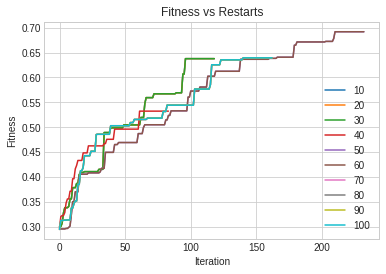

In [21]:
restarts_fit = []
ax = None
fig = plt.figure()
for re in restarts:
    rhc_curve_restart = rhc_curve[rhc_curve.Restarts == re]
    idx = rhc_curve_restart.Fitness.idxmax()
    best_restart_attempt = rhc_curve.iloc[idx].current_restart
    best_curve = rhc_curve.loc[(rhc_curve_restart.current_restart == best_restart_attempt) & (rhc_curve.Restarts == re)]
    best_curve.reset_index(inplace=True)
    best_curve['true_fit'] = 1/ best_curve.Fitness * 1000
    ax = best_curve['true_fit'].plot()
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
ax.legend(restarts)
ax.set_title("Fitness vs Restarts")
fig.savefig(figure_dir + f"/{exp_name}_rhc_restarts.png")


In [41]:
init_temp = [1, 10, 50, 100, 250, 500, 1000]
sa_runner = mlrose_hiive.SARunner(problem,
                           seed=seed,
                           output=output_dir,
                           max_attempts=max_attempts,
                           experiment_name=exp_name,
                           iteration_list=[100000],
                           temperature_list=init_temp,
                           decay_list=[mlrose_hiive.GeomDecay],
                           )
sa_stats, sa_curve = sa_runner.run()

Running sa
*****************
*** Run START ***
*****************
schedule:[1], max_iters:[100000], output:[output]
runner_name:[sa], experiment_name:[TSP], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[2187.6152]
	[20 10 14 13  1 21 11 19  8  6 16  4  2  5 17  9  7 18  3  0 15 12]...

schedule:[1], max_iters:[100000], output:[output]
runner_name:[sa], experiment_name:[TSP], attempt:[23], iteration:[99], done:[True], time:[0.02], fitness:[1524.5305]
	[18 10 14  3 15 20 11 19  8  0 16  2  4 21 17  1  9  7 13  6  5 12]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[10], max_iters:[100000], output:[output]
runner_name:[sa], experiment_name:[TSP], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[2187.6152]
	[20 10 14 13  1 21 11 19  8  6 16  4  2  5 17  9  7 18  3  0 15 12]...

schedule:[10], max_iters:[100000], output:[output]
runner_name:[sa], experiment_name:[TSP], attempt:[23], iteratio

In [81]:
sa_curve['init_temp'] = sa_curve.Temperature.apply(lambda t: t.init_temp)
sa_curve

,Iteration,Time,Fitness,Temperature,max_iters,output,init_temp
0,0,0.000177,2187.615177,1,100000,output,1
1,1,0.000939,2187.615177,1,100000,output,1
2,2,0.001099,2187.615177,1,100000,output,1
3,3,0.001253,2187.615177,1,100000,output,1
4,4,0.001405,2187.615177,1,100000,output,1
...,...,...,...,...,...,...,...
1828,1828,0.059290,1521.144847,1000,100000,output,1000
1829,1829,0.059403,1521.144847,1000,100000,output,1000
1830,1830,0.059515,1521.144847,1000,100000,output,1000
1831,1831,0.059627,1521.144847,1000,100000,output,1000


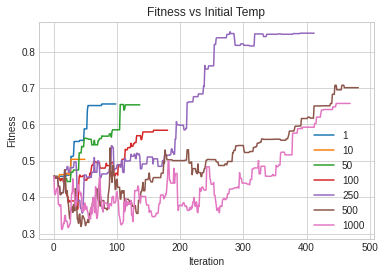

In [84]:
ax = None
fig = plt.figure()
for temp in init_temp:
    best_curve = sa_curve[sa_curve.init_temp == temp]
    # best_curve = rhc_curve.loc[(rhc_curve_restart.current_restart == best_restart_attempt) & (rhc_curve.Restarts == re)]
    best_curve.reset_index(inplace=True)
    best_curve['true_fit'] = 1/ best_curve.Fitness * 1000
    ax = best_curve['true_fit'].plot()
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
ax.legend(init_temp)
ax.set_title("Fitness vs Initial Temp")
fig.savefig(figure_dir + f"/{exp_name}_sa_init_temp.png")

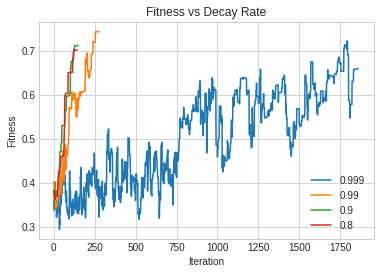

In [114]:
# decay_rate = [{'init_temp': 250, 'decay':0.1, 'min_temp': 0.001}]
decay_rate = [0.999, 0.99, 0.9, 0.8]
out = None
fig = plt.figure()
for dr in decay_rate:
    schedule = GeomDecay(init_temp=250, decay=dr)
    s,f,curve = mlrose_hiive.simulated_annealing(problem,
                                                 schedule=schedule,
                                                 max_attempts=max_attempts,
                                                 max_iters=100000,
                                                 random_state=seed,
                                                 curve=True)
    df = pd.DataFrame(curve)
    df['true_fit'] = 1000/df[0]
    ax = df.true_fit.plot()
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
ax.legend(decay_rate)
ax.set_title("Fitness vs Decay Rate")
fig.savefig(figure_dir + f"/{exp_name}_sa_decay_rate.png")

In [128]:
population = [50, 100, 250, 500, 1000]
mutations_rates = [0.01, 0.1, 0.25, 0.5]

In [133]:
ga_population_runner = mlrose_hiive.GARunner(problem,
                                  seed=seed,
                                  output=output_dir,
                                  max_attempts=max_attempts,
                                  experiment_name=exp_name+'_population',
                                  iteration_list=[100000],
                                  population_sizes=population,
                                  mutation_rates=[0.1]
                                  )

ga_population_stats, ga_population_curve = ga_population_runner.run()

Running ga
*****************
*** Run START ***
*****************
pop_size:[50], mutation_prob:[0.1], max_iters:[100000], output:[output]
runner_name:[ga], experiment_name:[TSP_population], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[2187.6152]
	[20 10 14 13  1 21 11 19  8  6 16  4  2  5 17  9  7 18  3  0 15 12]...

pop_size:[50], mutation_prob:[0.1], max_iters:[100000], output:[output]
runner_name:[ga], experiment_name:[TSP_population], attempt:[23], iteration:[67], done:[True], time:[0.48], fitness:[1183.3996]
	[ 7 17  5 16  3  8 14 18 10 19  0 12 15 20 11  9  1 13  2  6 21  4]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[100], mutation_prob:[0.1], max_iters:[100000], output:[output]
runner_name:[ga], experiment_name:[TSP_population], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[2187.6152]
	[20 10 14 13  1 21 11 19  8  6 16  4  2  5 17  9  7 18  3  0 15 12]...

pop_size:[100],

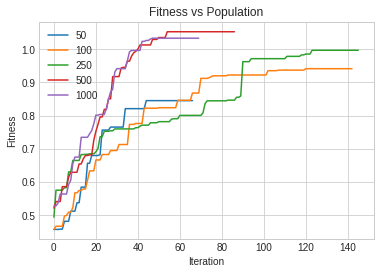

In [121]:
fig = plt.figure()

for ppl in population:
    best_curve = ga_population_curve[ga_population_curve['Population Size'] == ppl]
    best_curve.reset_index(inplace=True)
    best_curve['true_fit'] = 1/ best_curve.Fitness * 1000
    ax = best_curve['true_fit'].plot()
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
ax.legend(population)
ax.set_title("Fitness vs Population")
fig.savefig(figure_dir + f"/{exp_name}_ga_population.png")

In [134]:
ga_mut_runner = mlrose_hiive.GARunner(problem,
                                  seed=seed,
                                  output=output_dir,
                                  max_attempts=max_attempts,
                                  experiment_name=exp_name+'_mutation',
                                  iteration_list=[100000],
                                  population_sizes=[500],
                                  mutation_rates=mutations_rates
                                  )

ga_mut_stats, ga_mut_curve = ga_mut_runner.run()

Running ga
*****************
*** Run START ***
*****************
pop_size:[500], mutation_prob:[0.01], max_iters:[100000], output:[output]
runner_name:[ga], experiment_name:[TSP_mutation], attempt:[0], iteration:[0], done:[False], time:[0.03], fitness:[2187.6152]
	[20 10 14 13  1 21 11 19  8  6 16  4  2  5 17  9  7 18  3  0 15 12]...

pop_size:[500], mutation_prob:[0.01], max_iters:[100000], output:[output]
runner_name:[ga], experiment_name:[TSP_mutation], attempt:[23], iteration:[73], done:[True], time:[4.83], fitness:[982.9830]
	[ 0  3 14 19 10 18  8  5 16  2  6 13 21  4  7  1 17  9 11 20 12 15]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[500], mutation_prob:[0.1], max_iters:[100000], output:[output]
runner_name:[ga], experiment_name:[TSP_mutation], attempt:[0], iteration:[0], done:[False], time:[0.03], fitness:[2187.6152]
	[20 10 14 13  1 21 11 19  8  6 16  4  2  5 17  9  7 18  3  0 15 12]...

pop_size:[500], mu

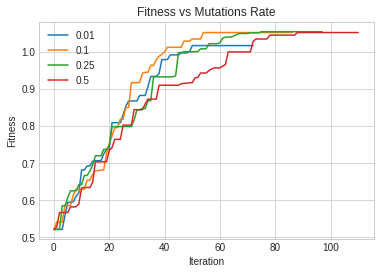

In [132]:
fig = plt.figure()
for mu in mutations_rates:
    best_curve = ga_mut_curve[ga_mut_curve['Mutation Rate'] == mu]
    best_curve.reset_index(inplace=True)
    best_curve['true_fit'] = 1/ best_curve.Fitness * 1000
    ax = best_curve['true_fit'].plot()
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
ax.legend(mutations_rates)
ax.set_title("Fitness vs Mutations Rate")
fig.savefig(figure_dir + f"/{exp_name}_ga_mutations.png")


In [143]:
population = [100, 250, 500, 1000, 2000, 5000]
keep_percent = [0.01, 0.1, 0.2, 0.4, 0.6]

In [144]:
mimic_population_runner = mlrose_hiive.MIMICRunner(problem,
                                      seed=seed,
                                      output=output_dir,
                                      max_attempts=max_attempts,
                                      experiment_name=exp_name+'_population',
                                      iteration_list=[100000],
                                        population_sizes=population,
                                        keep_percent_list=[0.2])
mimic_population_stats, mimic_population_curve = mimic_population_runner.run()

Running mimic
*****************
*** Run START ***
*****************
use_fast_mimic:[False], pop_size:[100], keep_pct:[0.2], max_iters:[100000], output:[output]
runner_name:[mimic], experiment_name:[TSP_population], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[2187.6152]
	[20 10 14 13  1 21 11 19  8  6 16  4  2  5 17  9  7 18  3  0 15 12]...

use_fast_mimic:[False], pop_size:[100], keep_pct:[0.2], max_iters:[100000], output:[output]
runner_name:[mimic], experiment_name:[TSP_population], attempt:[23], iteration:[24], done:[True], time:[5.26], fitness:[2126.3944]
	[14  0  4  9  6  5  2 16  7  1 13 20 12 17 21 10  3 15 11 19 18  8]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[False], pop_size:[250], keep_pct:[0.2], max_iters:[100000], output:[output]
runner_name:[mimic], experiment_name:[TSP_population], attempt:[0], iteration:[0], done:[False], time:[0.02], fitness:[2187.6152]
	[20 10 14 13  1 

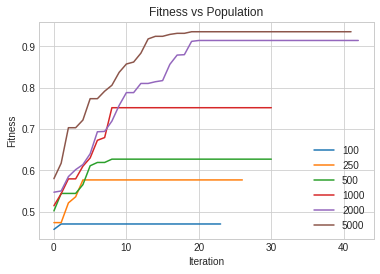

In [145]:
fig = plt.figure()

for ppl in population:
    best_curve = mimic_population_curve[mimic_population_curve['Population Size'] == ppl]
    best_curve.reset_index(inplace=True)
    best_curve['true_fit'] = 1/ best_curve.Fitness * 1000
    ax = best_curve['true_fit'].plot()
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
ax.legend(population)
ax.set_title("Fitness vs Population")
fig.savefig(figure_dir + f"/{exp_name}_mimic_population.png")

In [146]:
mimic_keep_runner = mlrose_hiive.MIMICRunner(problem,
                                      seed=seed,
                                      output=output_dir,
                                      max_attempts=max_attempts,
                                      experiment_name=exp_name+'_population',
                                      iteration_list=[100000],
                                        population_sizes=[5000],
                                        keep_percent_list=keep_percent)

mimic_keep_stats, mimic_keep_curve = mimic_keep_runner.run()

Running mimic
*****************
*** Run START ***
*****************
use_fast_mimic:[False], pop_size:[5000], keep_pct:[0.01], max_iters:[100000], output:[output]
runner_name:[mimic], experiment_name:[TSP_population], attempt:[0], iteration:[0], done:[False], time:[0.33], fitness:[2187.6152]
	[20 10 14 13  1 21 11 19  8  6 16  4  2  5 17  9  7 18  3  0 15 12]...

use_fast_mimic:[False], pop_size:[5000], keep_pct:[0.01], max_iters:[100000], output:[output]
runner_name:[mimic], experiment_name:[TSP_population], attempt:[23], iteration:[24], done:[True], time:[115.19], fitness:[1620.2301]
	[ 3 16  2  9 17  1  5 10  8 14 18 19 11 20 12 15  7  4  6 21 13  0]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[False], pop_size:[5000], keep_pct:[0.1], max_iters:[100000], output:[output]
runner_name:[mimic], experiment_name:[TSP_population], attempt:[0], iteration:[0], done:[False], time:[0.29], fitness:[2187.6152]
	[20 10 14

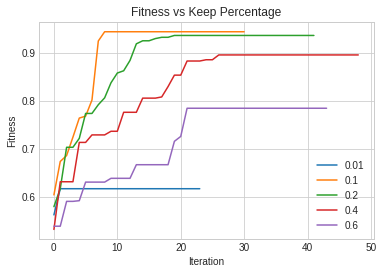

In [150]:
fig = plt.figure()
for kp in keep_percent:
    best_curve = mimic_keep_curve[mimic_keep_curve['Keep Percent'] == kp]
    best_curve.reset_index(inplace=True)
    best_curve['true_fit'] = 1/ best_curve.Fitness * 1000
    ax = best_curve['true_fit'].plot()
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
ax.legend(keep_percent)
ax.set_title("Fitness vs Keep Percentage")
fig.savefig(figure_dir + f"/{exp_name}_mimic_keep.png")

        Iteration        Time      Fitness  max_iters  init_temp    true_fit
count  412.000000  412.000000   412.000000      412.0      412.0  412.000000
mean   673.500000    0.024356  1659.301015   100000.0      250.0    0.647345
std    119.078406    0.013254   443.514696        0.0        0.0    0.169916
min    468.000000    0.000100  1170.429991   100000.0      250.0    0.355759
25%    570.750000    0.013290  1188.846139   100000.0      250.0    0.488119
50%    673.500000    0.024693  1670.382209   100000.0      250.0    0.598665
75%    776.250000    0.035569  2048.682866   100000.0      250.0    0.841152
max    879.000000    0.046972  2810.887753   100000.0      250.0    0.854387


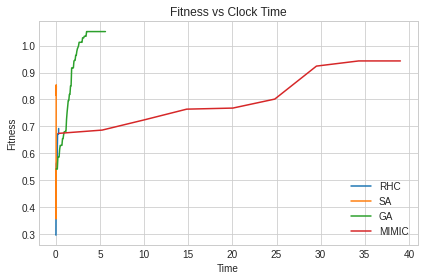

In [258]:
fig, ax = plt.subplots()

best_rhc_curve = rhc_curve[rhc_curve.Restarts == 60]
idx = best_rhc_curve.Fitness.idxmax()
best_restart_attempt = rhc_curve.iloc[idx].current_restart
best_rhc_curve = rhc_curve.loc[(best_rhc_curve.current_restart == best_restart_attempt) & (rhc_curve.Restarts == 60)]
best_rhc_curve['true_fit'] = 1/ best_rhc_curve.Fitness * 1000
best_rhc_curve['true_time'] = best_rhc_curve.Time - best_rhc_curve.iloc[0].Time
best_rhc_curve.plot(x='true_time', y='true_fit', ax=ax)

best_sa_curve = sa_curve[sa_curve.init_temp == 250]
best_sa_curve['true_fit'] = 1/ best_sa_curve.Fitness * 1000
best_sa_curve = best_sa_curve.iloc[1:]
best_sa_curve.plot(x='Time', y='true_fit',ax=ax)
print(best_sa_curve.describe())

best_ga_curve = ga_mut_curve[ga_mut_curve['Mutation Rate'] == 0.1]
best_ga_curve['true_fit'] = 1/ best_ga_curve.Fitness * 1000
best_ga_curve = best_ga_curve.iloc[1:]
best_ga_curve.plot(x='Time', y='true_fit',ax=ax)

best_mimic_curve = mimic_keep_curve[mimic_keep_curve['Keep Percent'] == 0.1]
best_mimic_curve['true_fit'] = 1/ best_mimic_curve.Fitness * 1000
best_mimic_curve = best_mimic_curve.iloc[1:10]
best_mimic_curve.plot(x='Time', y='true_fit', ax=ax, xlabel='Time')
ax.legend(["RHC", "SA", "GA", "MIMIC"])
ax.set_xlabel("Time")
ax.set_ylabel("Fitness")
ax.set_title("Fitness vs Clock Time")
ax.get_figure().tight_layout()
fig.savefig(figure_dir + f"/{exp_name}_comp.png", transparent=False)

In [281]:
cities = [10, 20, 50, 80, 100]
rhc = np.zeros(len(cities))
sa = np.zeros(len(cities))
ga = np.zeros(len(cities))
mimic = np.zeros(len(cities))

comp = pd.DataFrame({
    'Complexity': cities,
    'RHC': rhc,
    'SA': sa,
    "GA": ga,
    'MIMIC': mimic
})
print(comp)
for i, c in enumerate(cities):
    print(c)
    problem = TSPGenerator.generate(seed=seed, number_of_cities=c)
    max_attempts = problem.get_length()
    s,f,curve = mlrose_hiive.random_hill_climb(problem,
                                         restarts=30,
                                         max_attempts=max_attempts,
                                         max_iters=100000,
                                         curve=False)
    comp.at[i, 'RHC'] = max_attempts*100/f

    s,f,curve = mlrose_hiive.simulated_annealing(problem,
                                         schedule=GeomDecay(init_temp=250),
                                         max_attempts=max_attempts,
                                         max_iters=100000,
                                         curve=False)
    comp.at[i, 'SA'] = max_attempts*100/f

    s,f,curve = mlrose_hiive.genetic_alg(problem,
                                         pop_size=500,
                                         max_attempts=max_attempts,
                                         max_iters=100000,
                                         curve=False)
    comp.at[i, 'GA'] = max_attempts*100/f

    s,f,curve = mlrose_hiive.mimic(problem,
                                   pop_size=1000,
                                   keep_pct=0.1,
                                   max_attempts=max_attempts,
                                   max_iters=100000,
                                   curve=False)
    comp.at[i, 'MIMIC'] = max_attempts*100/f
comp

   Complexity  RHC   SA   GA  MIMIC
0          10  0.0  0.0  0.0    0.0
1          20  0.0  0.0  0.0    0.0
2          50  0.0  0.0  0.0    0.0
3          80  0.0  0.0  0.0    0.0
4         100  0.0  0.0  0.0    0.0
10
20
50
80
100


,Complexity,RHC,SA,GA,MIMIC
0,10,1.110941,1.044778,1.254305,1.254305
1,20,1.478899,1.526638,2.176823,1.425028
2,50,1.895914,1.819598,2.851912,1.335507
3,80,2.128421,2.009425,3.412794,1.373799
4,100,2.082859,2.020826,3.712460,1.041166


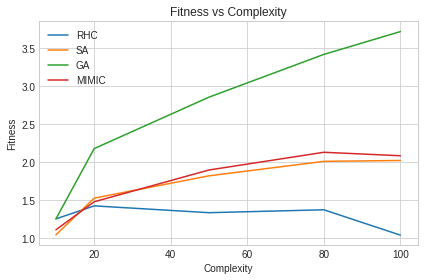

In [336]:
fig, ax = plt.subplots()
comp.plot(x='Complexity', y='MIMIC',ax=ax)
comp.plot(x='Complexity', y='SA',ax=ax)
comp.plot(x='Complexity', y='GA',ax=ax)
comp.plot(x='Complexity', y='RHC',ax=ax)


ax.set_xlabel("Complexity")
ax.set_ylabel("Fitness")
ax.set_title("Fitness vs Complexity")
ax.get_figure().tight_layout()
ax.legend(["RHC", "SA", "GA", "MIMIC"])
fig.savefig(figure_dir + f"/{exp_name}_fit_comp.png", transparent=False)

In [302]:
rhc_stats[rhc_stats.Restarts == 30].Fitness.idxmin()
1000/rhc_stats.iloc[67].Fitness
rhc_stats.iloc[68].Time - rhc_stats.iloc[67].Time

0.022188412956893444

In [308]:
sa_stats['true_fit'] = sa_stats.Fitness/200
sa_stats[sa_stats.schedule_init_temp == 500].Fitness.idxmin()
1000/sa_stats.iloc[11].Fitness
sa_stats.Time[11] - sa_stats.Time[10]
# sa_stats

0.059958855039440095

In [313]:
ga_population_stats.Fitness.idxmin()
1000/ga_population_stats.iloc[7].Fitness
ga_population_stats.iloc[7].Time - ga_population_stats.iloc[6].Time

5.882309469976462

In [332]:
mimic_keep_stats.Fitness.idxmin()
1000/mimic_keep_stats.Fitness.min()
mimic_keep_stats.iloc[3].Time - mimic_keep_stats.iloc[2].Time
mimic_keep_curve[mimic_keep_curve['Population Size'] == 5000].Fitness.idxmin()
# mimic_keep_curve.iloc[32].Time - mimic_keep_curve.iloc[0].Time
df = mimic_keep_curve[mimic_keep_curve['Population Size'] == 5000]
df.iloc[32].Time - df.iloc[0].Time

33.97845016105566